In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.lines import Line2D

In [2]:
tranD = np.loadtxt('trans.txt')
O3_line = np.loadtxt('O3.txt')
H2O_line = np.loadtxt('H2O.txt')
CO2_line = np.loadtxt('CO2.txt')

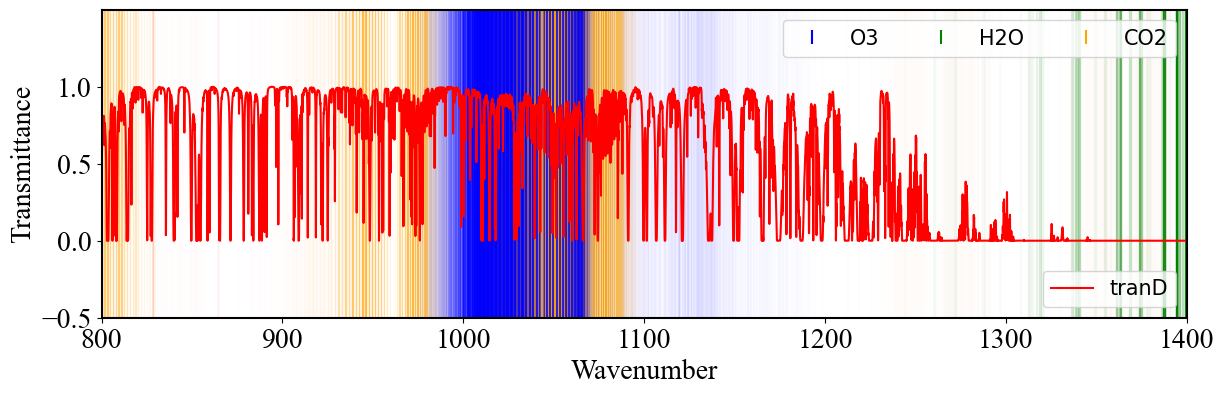

In [5]:

# Set up the plot
fig, ax = plt.subplots(figsize=(14, 4))

# Plot the spectral line
ax.plot(tranD[:, 0], tranD[:, 1], color='red', linewidth=1.5)

# Function to plot the absorption bands
def plot_absorption_bands(ax, line_data, color):
    max_int = np.max(line_data[:,2])
    min_int = np.min(line_data[:,2])
    line_data[:,2] = (line_data[:,2]-min_int)/(max_int-min_int)
    for row in line_data:
        wavenumber = row[1]
        intensity = row[2]
        half_width = row[5]  # Average the half-width
        # Create a range for the absorption band
        wavenumber_range = np.linspace(wavenumber - half_width, wavenumber + half_width, 2)
        # The alpha value is proportional to the intensity (clipped between 0 and 1)
        # alpha_value = intensity
        ax.fill_between(wavenumber_range, -0.5, 1.5, color=color, alpha=intensity, edgecolor=color)

# Plot the absorption bands for O3, H2O, and CO2
plot_absorption_bands(ax, O3_line, 'blue')
plot_absorption_bands(ax, H2O_line, 'green')
plot_absorption_bands(ax, CO2_line, 'orange')

# # Set labels with the desired font

bwidth = 1.5
TK = plt.gca()
TK.spines['bottom'].set_linewidth(bwidth)
TK.spines['right'].set_linewidth(bwidth)
TK.spines['left'].set_linewidth(bwidth)
TK.spines['top'].set_linewidth(bwidth)

o3_l = Line2D([], [], marker='|',linestyle='None', color='blue', markersize=10, markeredgewidth=1.5)
h2o_l = Line2D([], [], marker='|',linestyle='None',  color='green', markersize=10, markeredgewidth=1.5)
co2_l = Line2D([], [], marker='|',linestyle='None',  color='orange', markersize=10, markeredgewidth=1.5)

# Create the legend for the absorption bands with vertical lines
band_legend = ax.legend([o3_l, h2o_l, co2_l], ['O3', 'H2O', 'CO2'], loc='upper right', frameon=True,ncol=3,fontsize=15)

# Add the legend manually to the plot
ax.add_artist(band_legend)

# Plot the tranD spectral line (using placeholder data) and create a second legend
tranD_line, = ax.plot([0, 1], [0.5, 0.5], color='red', linewidth=1.5)
line_legend = ax.legend([tranD_line], ['tranD'], loc='lower right', frameon=True,fontsize=15)

font_properties = fm.FontProperties(family='Times New Roman', size=20)
ax.set_xlabel('Wavenumber', fontproperties=font_properties)
ax.set_ylabel('Transmittance', fontproperties=font_properties)

ax.set_ylim([-0.5, 1.5])
ax.set_xlim([800,1400])
# Set the font properties for the tick labels
for label in ax.get_xticklabels():
    label.set_fontproperties(font_properties)
for label in ax.get_yticklabels():
    label.set_fontproperties(font_properties)

plt.yticks(np.arange(-0.5,1.5,0.5))

# Display the plot
plt.show()
